# Programmierkurs 2 Data Science (WS23/24)
Praktikum II: Pandas I+II, Visualization

*   Abgabe zu zweit oder individuell.
*   Abgabe über Ilias als .ipynb file mit kompilierter Ausgabe.
*   Abgabefrist siehe Ilias.
*   Nicht kompilierter Code wird nicht bewertet.
*   Bei allen Codingaufgaben bitte ich Sie die finale Datenstrukturen auszugeben/anzuzeigen und einen inline-Kommentar mit dem Aufgabenkürzel in die oberste Code Zelle hinzuzufügen `#(a)`.
*   Bitte die Dokumentenstruktur und Aufgabenstellung beibehalten: Sie können jedoch beliebig viele Code oder Text Zellen für die Bearbeitung der Aufgaben hinzufügen.
---



In diesem Praktikum arbeiten Sie mit einem zusammengesetzten Datensatz DSA hergeleitet aus den folgenden Quellen:


1.   **D**eutschlands **S**tudierende nach **A**uslandsstudienland und Jahr: https://www.govdata.de/web/guest/suchen/-/details/deutsche-studierende-im-ausland-nach-studienland
2.   Deutschlands Handelspartner nach Mrd. € Volumen (2015): https://www.bpb.de/kurz-knapp/zahlen-und-fakten/globalisierung/52845/deutschland-handelspartner/
3.   Kontinent und Durchschnittstemperatur (2021): https://de.wikipedia.org/wiki/Liste_der_L%C3%A4nder_nach_Temperatur






In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
import plotly.express as px

#Pandas I [10 Punkte]

---

(a) [1 Punkt] Importieren Sie den ISA Datensatz (https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Praktikum/FHDTM-P2DS-WS2324_PraktikumII.csv) als `df_dsa` mit Pandas I/O Funktionalitäten. Hinweis: Verwenden Sie zusätzlich `encoding='latin-1'` als Parameter für den Import.

---

In [3]:
df_dsa = pd.read_csv("https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Praktikum/FHDTM-P2DS-WS2324_PraktikumII.csv", encoding='latin-1')

(b) [1 Punkt] Geben Sie die ersten drei und die letzten drei Zeilen des Datensatzes aus. Listen Sie in Stichpunkten drei auffallende Unterschiede im Vergleich auf.

---

In [ ]:
df_dsa.head(3)

,Studienland,Kontinent,Durchschnittstemperatur_2021,Außenhandel_Export_Mrd_2015,Außenhandel_Import_Mrd_2015,1995,2000,2005,2010,2015,2020,2021
0,Östereich,Europa,"7,35",58.2,37.3,5955.0,5889.0,10174.0,27350.0,27563.0,33836,NaN
1,Niederlande,Europa,"10,39",79.2,87.9,836.0,3176.0,11896.0,23831.0,21530.0,24494,NaN
2,Vereinigtes Königsreich,Europa,"9,38",89.0,38.4,8233.0,10115.0,11600.0,14950.0,15410.0,12670,NaN


In [ ]:
df_dsa.tail(3)

,Studienland,Kontinent,Durchschnittstemperatur_2021,Außenhandel_Export_Mrd_2015,Außenhandel_Import_Mrd_2015,1995,2000,2005,2010,2015,2020,2021
40,Ukraine,Europa,"9,38",NaN,NaN,NaN,NaN,NaN,NaN,59.0,161,NaN
41,Island,Europa,"2,40",NaN,NaN,NaN,27.0,98.0,167.0,122.0,155,NaN
42,Vatikanstadt,Europa,NaN,NaN,NaN,230.0,180.0,161.0,200.0,142.0,124,NaN


(c) [2 Punkte] Prägen Sie die `value_counts()` Methode auf ein sinnvolles Attribut aus und beschreiben Sie kurz den Aussagewert.

---





In [ ]:
df_dsa.Kontinent.value_counts()

Europa          29
Asien            5
Nordamerika      2
Europa-Asien     2
Australien       2
Südamerika       2
Afrika           1
Name: Kontinent, dtype: int64

(d) [3 Punkte] Untersuchen Sie die Datentypen der einzelnen Attribute. Sollten ihnen unerwünschte Datentypen einer Serie auffallen, überschreiben Sie diese in den gewünschten Datentypen. Geben Sie den veränderten Datentypen über  `DataFrame.Series.dtype` aus.

---

In [ ]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Studienland                   43 non-null     object 
 1   Kontinent                     43 non-null     object 
 2   Durchschnittstemperatur_2021  42 non-null     object 
 3   Außenhandel_Export_Mrd_2015   19 non-null     float64
 4   Außenhandel_Import_Mrd_2015   20 non-null     float64
 5   1995                          23 non-null     float64
 6   2000                          32 non-null     float64
 7   2005                          35 non-null     float64
 8   2010                          40 non-null     float64
 9   2015                          42 non-null     float64
 10  2020                          43 non-null     int64  
 11  2021                          7 non-null      float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.2+ KB


In [ ]:
df_dsa.Durchschnittstemperatur_2021 = df_dsa.Durchschnittstemperatur_2021.str.replace(",",".").astype(float)

In [ ]:
df_dsa. Durchschnittstemperatur_2021.dtype

dtype('float64')

(e) [3 Punkte] Erstellen Sie eine Boolean Maske `dsa_mask_eu_20c_1000s `für alle Studienländer, welche außerhalb Europa's liegen, über 20 Grad im Durchschnitt und über 1000 deutsche Studierende im Jahr 2020 hatten. Geben Sie die zutreffenden Länder durch Einsetzen der Maske in `df_dsa` ein.

---

In [ ]:
dsa_mask_eu_20c_1000s = (df_dsa.Kontinent != "Europa") & (df_dsa["2020"] > 1000) & (df_dsa.Durchschnittstemperatur_2021 > 20)

In [ ]:
df_dsa[dsa_mask_eu_20c_1000s]

,Studienland,Kontinent,Durchschnittstemperatur_2021,Außenhandel_Export_Mrd_2015,Außenhandel_Import_Mrd_2015,1995,2000,2005,2010,2015,2020,2021
19,Australien,Australien,22.06,NaN,NaN,180.0,378.0,1632.0,2044.0,1147.0,1078,NaN


#  Pandas II [25 Punkte]

## Data Cleaning + Smoothing

---

(a.1) [2 Punkte] Verschaffen Sie sich durch die Hilfe einer Heatmap einen Überblick über die Anzahl von np.NaN Werten in `df_dsa`.

<Axes: >

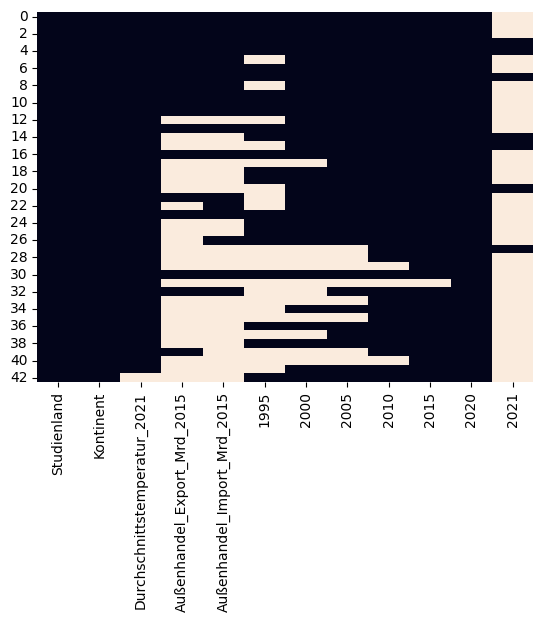

In [6]:
fig = plt.figure()
ax = plt.axes()
sns.heatmap((df_dsa.isnull()), cbar=False)

(a.2) [2 Punkte] Suchen Sie sich drei Attribute mit np.NaN Werten in `df_dsa` aus. Leiten Sie für jedes Attribut mögliche Gründe ab, wieso Werte nicht konsistent im Datensatz vorliegen.  

(a.3) [2 Punkte] Beschreiben Sie für jedes ausgewählte Attribut aus (a.2) eine sinnvolle Strategie, wie Sie mit np.NaN Werten umgehen.

(a.4) [2 Punkte] Implementieren Sie eine der Strategien aus (a.3) und überschrieben Sie das entsprechende Attribute von `df_dsa`.

(a.5) [2 Punkte] Finden Sie heraus, ob alle Studienländer nach `Kontinent` sinnvoll aufgruppiert werden können oder Information verloren geht. Welche Konfliktform ist bei der Datenintegration oder Datenaggregation enstanden?

##Data Transformation: Attribute Construction + Generalization
---

(b.1) [2 Punkte] Berechnen Sie das Saldo zwischen `Außenhandel_Export_Mrd_2015` und `Außenhandel_Import_Mrd_2015` und fügen die Serie in `df_dsa` als `Außenhandel_Saldo_Mrd_2015` an.

In [7]:
df_dsa["Außenhandel_Saldo_Mrd_2015"] = df_dsa["Außenhandel_Export_Mrd_2015"] - df_dsa["Außenhandel_Import_Mrd_2015"]

(b.2) [2 Punkte] Berechnen Sie den Außenhandelsumsatz zwischen `Außenhandel_Export_Mrd_2015` und `Außenhandel_Import_Mrd_2015` und fügen die Serie in `df_dsa` als `Außenhandel_Umsatz_Mrd_2015` an.

In [8]:
df_dsa["Außenhandel_Umsatz_Mrd_2015"] = df_dsa["Außenhandel_Export_Mrd_2015"] + df_dsa["Außenhandel_Import_Mrd_2015"]

(b.3) [5 Punkte] Kategorisieren Sie die Länder nach
*   Profitabler Partner (Saldo > 0)
*   Profitabler Großpartner (Saldo > 0 und Umsatz > 50)
*   Defizitärer Partner (Saldo < 0)
*   Defizitärer Großpartner (Saldo < 0 und Umsatz > 50)
*   Partner (default)

und fügen die mittels `.apply` und `lambda` erstellte Serie in `df_dsa` als `Kategorie_Partner` an.


In [9]:
def get_category_partner(saldo, umsatz):
  if((saldo > 0) & (umsatz > 50)):
    return "Profitabler Großpartner"
  elif((saldo < 0) & (umsatz > 50)):
    return "Defizitärer Großpartner"
  elif(saldo > 0):
    return "Profitabler Partner"
  elif(saldo < 0):
    return "Defizitärer Partner"
  else:
    return "Partner"

In [15]:
df_dsa[["Studienland", "Kontinent","Außenhandel_Saldo_Mrd_2015","Außenhandel_Umsatz_Mrd_2015"]].head()

,Studienland,Kontinent,Außenhandel_Saldo_Mrd_2015,Außenhandel_Umsatz_Mrd_2015
0,Östereich,Europa,20.9,95.5
1,Niederlande,Europa,-8.7,167.1
2,Vereinigtes Königsreich,Europa,50.6,127.4
3,Schweiz,Europa,7.0,91.2
4,Vereinigte Staaten,Nordamerika,53.5,173.9


In [24]:
df_dsa[0:3].apply(lambda x:
                  get_category_partner(
                      x.Außenhandel_Saldo_Mrd_2015,
                      x.Außenhandel_Umsatz_Mrd_2015)
                  , axis=1)

0    Profitabler Großpartner
1    Defizitärer Großpartner
2    Profitabler Großpartner
dtype: object

In [ ]:
df_dsa["Kategorie_Partner"] = df_dsa.apply(lambda x:
                                           get_category_partner(
                                               x.Außenhandel_Saldo_Mrd_2015,
                                               x.Außenhandel_Umsatz_Mrd_2015)
                                           , axis=1)

(b.4) [1 Punkt] Geben Sie alle "Profitabler Partner" kategorisierte Länder aus.

In [ ]:
df_dsa[df_dsa.Kategorie_Partner == "Profitabler Partner"]

,Studienland,Kontinent,Durchschnittstemperatur_2021,Außenhandel_Export_Mrd_2015,Außenhandel_Import_Mrd_2015,1995,2000,2005,2010,2015,2020,2021,Außenhandel_Saldo_Mrd_2015,Außenhandel_Umsatz_Mrd_2015,Kategorie_Partner
5,Türkei,Europa-Asien,12.63,22.3,14.5,NaN,96.0,202.0,1119.0,706.0,4261,NaN,7.8,36.8,Profitabler Partner
9,Dänemark,Europa,8.92,17.6,11.8,510.0,524.0,1002.0,2508.0,3554.0,3247,NaN,5.8,29.4,Profitabler Partner
11,Schweden,Europa,3.02,23.0,14.0,700.0,2033.0,2999.0,4134.0,4620.0,2037,NaN,9.0,37.0,Profitabler Partner


## Data Transformation: Grouping + Aggregation

---

(c.1) [2 Punkte] Summieren Sie die Studienländer nach der Partnerkategorie und bilden Sie die Summe von Studierenden im Ausland im Jahr 2015.

In [ ]:
df_dsa.groupby("Kategorie_Partner")["2015"].sum()

Kategorie_Partner
Defizitärer Großpartner    30011.0
Defizitärer Partner         3883.0
Partner                    15619.0
Profitabler Großpartner    80100.0
Profitabler Partner         8880.0
Name: 2015, dtype: float64

(c.2) [1 Punkte] Gruppieren Sie die Studienländer nach Kontinent und bilden Sie den Durchschnitt von Studierenden im Ausland im Jahr 2020.

In [ ]:
df_dsa.groupby("Kontinent")["2020"].mean()

Kontinent
Afrika           425.000000
Asien            963.000000
Australien       652.000000
Europa          3937.103448
Europa-Asien    2258.500000
Nordamerika     3229.500000
Südamerika       313.000000
Name: 2020, dtype: float64

(c.3) [2 Punkt] In welchem Kontinent weichen die Werte aus (c.2) im Vergleich zu der gleichen Gruppierung mit der Median-Berechnung am stärksten ab? Welche Bedeutung haben die Diskrepanz zwischen Median und Mean für die entsprechenden Kontinente zur Folge?

In [ ]:
df_dsa.groupby("Kontinent")["2020"].median()

Kontinent
Afrika           425.0
Asien            234.0
Australien       652.0
Europa          1178.0
Europa-Asien    2258.5
Nordamerika     3229.5
Südamerika       313.0
Name: 2020, dtype: float64

#Visualization [20 Punkte]



(a) [2 Punkte] Erstellen Sie ein Boxplot über Plotly mit der Methode `px.box(df, y=[], hover_data=[])` und übergeben Sie `df_dsa` as DataFrame, die Attribute ["1995",	"2000",	"2005",	"2010",	"2015", "2020"] dem `y` Parameter und ["Studienland","Kontinent"] dem `hover_data` Parameter. Zwischen welchen Jahren findet ein Wechsel der extremsten Ausreißer (Studienland) statt?

In [ ]:
fig = px.box(df_dsa, y=["1995",	"2000",	"2005",	"2010",	"2015", "2020"], hover_data=["Studienland","Kontinent"])
fig.show()

(b) [2 Punkte] Erstellen Sie eine Korrelationsmatrix von `df_dsa` mit der pearson Methode. Visualisieren Sie die Korrelationsmatrix in einer Heatmap über die Seaborn Bibliothek.

<ipython-input-146-68cfede40f0e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

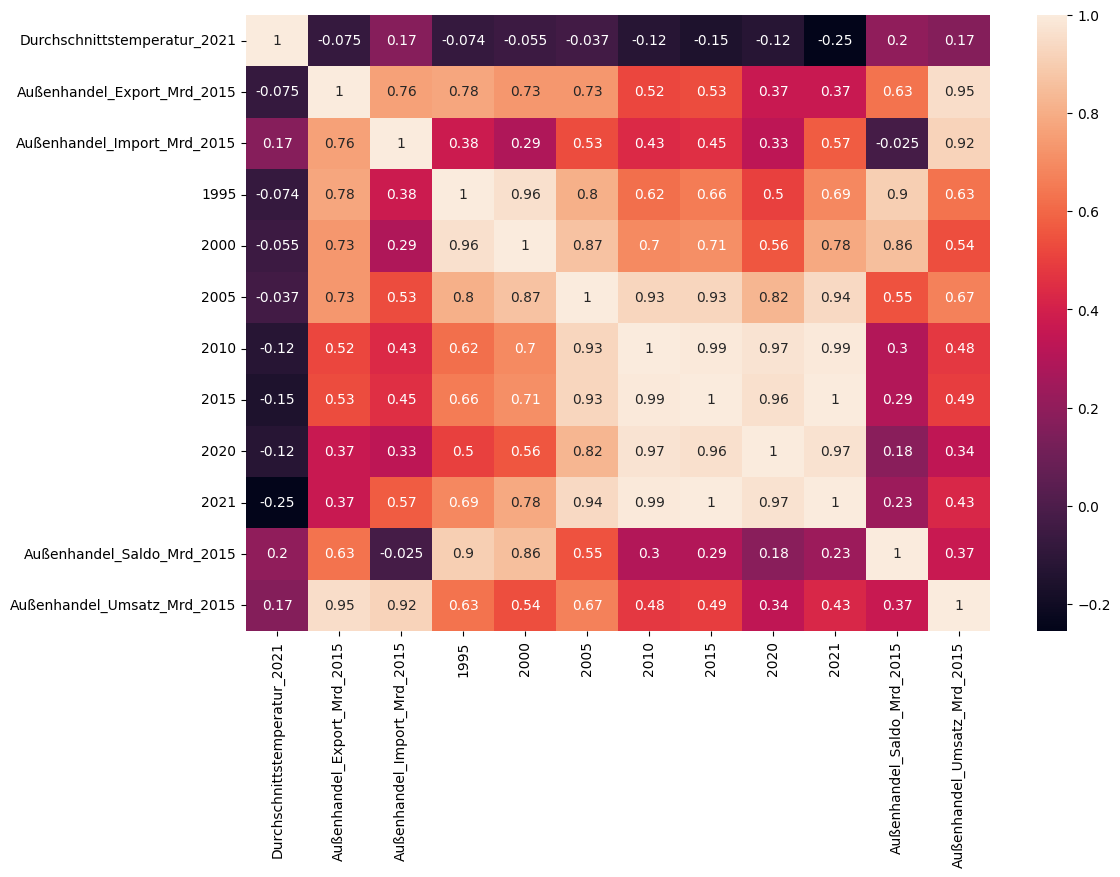

In [ ]:
corrMatrix = df_dsa.corr(method='pearson')
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(corrMatrix, annot=True)

(c) [6 Punkte] Diese folgenden zwei Visualisierungen können Sie mit der Bibliothek ihrer Wahl ausgeben:

1.   Erstellen Sie ein Stacked-Bar mit dem Kontinent (x), Anzahl deutscher Studierender von 2020 (y) und dem Studienland als Farbe (hue/color).
2.   Erstellen Sie ein Pie, Donut-Diagram oder Sunburst Diagram mit dem Kontinent als Kern ausgehend zu Studienländern. Labeln Sie die Studienländer Flächen mit der relativen Anzahl deutscher Studierender von 2020.

Bewerten Sie anschließend die Stärken der beiden Grafiken in Stichpunkten.


In [ ]:
fig = px.bar(df_dsa.sort_values("2020", ascending=False), x="Kontinent", y="2020", color="Studienland")
fig.show()

In [ ]:
fig = px.sunburst(df_dsa, path=['Kontinent','Studienland'],
                  values='2020')
fig.show()

(d) [10 Punkte] Suchen Sie sich eine interessante Korrelationswirkung aus (a.2) (Außenhandel Saldo und Umsatz von 2015k Anzahl deutscher Studierende im Ausland über die Jahre 1995, 2000, 2005, 2010 und 2015, oder die Durchschnittstemperatur) aus und erstellen Sie eine weitere Grafik ihrer Wahl (Line, Scatter, Stacked-Box, Pie, Sub-Burst, Parallel-Set), durch welche Sie eine Hypothese ihrer Wahl untermauern wollen. Die Grafik sollte mindestens zwei Attribute als Dimension enthalten und kann darüber hinaus per Marker und Color/Hue weitere Attributen aufzeigen. Sie können gerne im Vorschritt Daten gruppieren, aggregieren, normalisieren oder kategorische Daten skallieren.